#  Анализ данных о популярности книг
## Источник данных
Набор данных - [Goodreads-books](https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks)  

# 1. Краткое содержание dataset - описание данных



      bookID - уникальный идентификационный номер для каждой книги
      title - название, под которым была опубликована книга
      authors - имена авторов книги
      average_rating - Средняя оценка, полученная книгой в целом
      isbn – международный стандартный номер
      isbn13 - 13-значный ISBN для идентификации книги вместо стандартного 11-значного ISBN
      language_code – языковой код
      num_pages - Количество страниц, содержащихся в книге
      ratings_count - Общее количество оценок, полученных книгой
      text_reviews_count - Общее количество письменных отзывов, полученных книгой
      publisher - издательство
      genre - жанр
      release_year  - год выпуска
  

# 2. Примеры реализации запросов

## 2.1. Гистограмма распределения рейтинга популярности книг.

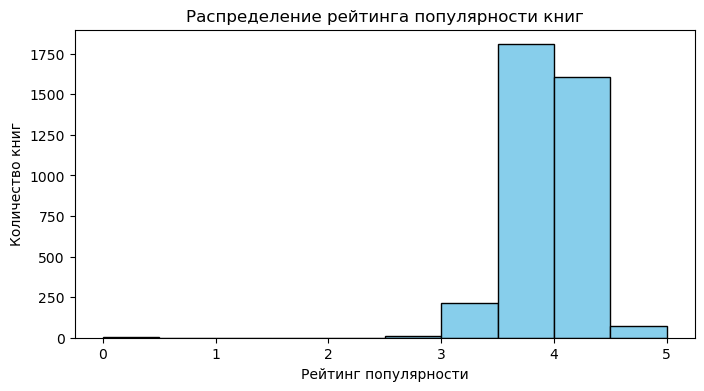

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных с указанием кодировки latin1
data = pd.read_csv(r'C:\Users\user\Desktop\books_update.csv', encoding='latin1')

# Построение гистограммы
plt.figure(figsize=(8, 4))
plt.hist(data['average_rating'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Рейтинг популярности')
plt.ylabel('Количество книг')
plt.title('Распределение рейтинга популярности книг')
plt.show()

Исходя из гистограммы, показанной выше, можно сделать следующие наблюдения о распределении рейтинга популярности книг:
* Большинство книг имеют средний рейтинг популярности, так как на гистограмме преобладают столбцы в центре среднего диапазона рейтинга.
* Книг с очень низким или очень высоким рейтингом популярности сравнительно меньше, поскольку крайние столбцы на гистограмме меньше по высоте.
 

## 2.2. Сравнение количества книг по жанрам с помощью диаграммы столбцов

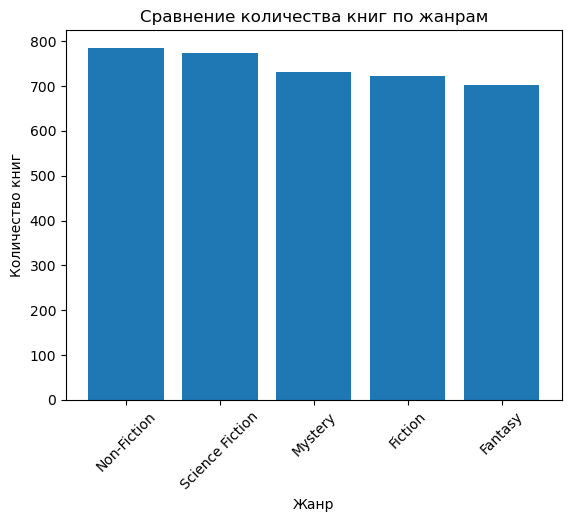

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных с указанием кодировки latin1
data = pd.read_csv(r'C:\Users\user\Desktop\books_update.csv', encoding='latin1')

# Построим диаграмму
genre_count = data['genre'].value_counts()
plt.bar(genre_count.index, genre_count.values)
plt.xlabel('Жанр')
plt.ylabel('Количество книг')
plt.title('Сравнение количества книг по жанрам')
plt.xticks(rotation=45)
plt.show()

 Исходя из данных диаграммы, мы видим, что большая часть книг относится к научной литературе, меньше всего книг жанра фэнтази.

## 2.3. Scatter plot зависимости рейтинга популярности книги от количества оценок.

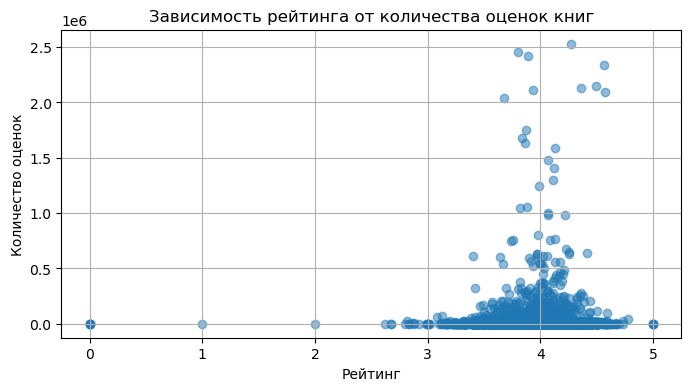

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных с указанием кодировки latin1
data = pd.read_csv("C:\\Users\\user\\Desktop\\books_update.csv", encoding='latin1')

plt.figure(figsize=(8, 4))
plt.scatter(data['average_rating'], data['ratings_count'], alpha=0.5)
plt.title('Зависимость рейтинга от количества оценок книг')
plt.xlabel('Рейтинг')
plt.ylabel('Количество оценок')
plt.grid(True)
plt.show()

Из анализа точечной диаграммы "Зависимость рейтинга от количества оценок книг" видно следующее:
* На графике прослеживается общая тенденция: чем больше количество оценок книги, тем выше может быть её рейтинг. Это может говорить о том, что популярные книги привлекают большее количество читателей и, как следствие, получают больше оценок.
* Однако существует определенный разброс данных: на графике видны книги с различными рейтингами, получившие разное количество оценок. Это может указывать на то, что рейтинг книги не всегда зависит только от количества оценок, и другие факторы также могут влиять на оценку читателей.
* График также показывает наличие выбросов в данных, то есть книг, которые имеют низкий рейтинг при высоком количестве оценок или наоборот. Эти выбросы могут быть интересны для дальнейшего анализа, чтобы понять, почему такие книги выделяются среди остальных.

## 2.4. Line chart зависимости среднего рейтинга популярности книг от времени.

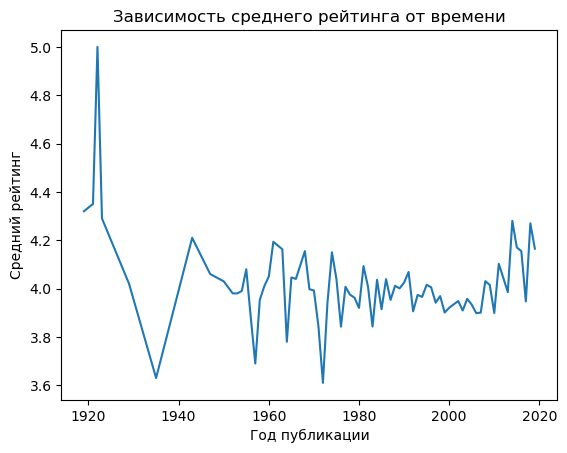

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных с указанием кодировки latin1
data = pd.read_csv("C:\\Users\\user\\Desktop\\books_update.csv", encoding='latin1')

data['publication_date'] = pd.to_datetime(data['publication_date'])
avg_rating_by_year = data.groupby(data['publication_date'].dt.year)['average_rating'].mean()
plt.plot(avg_rating_by_year.index, avg_rating_by_year.values)
plt.xlabel('Год публикации')
plt.ylabel('Средний рейтинг')
plt.title('Зависимость среднего рейтинга от времени')
plt.show()

Из анализа линейной диаграммы можно сделать следующие выводы:
* В целом, с течением времени средний рейтинг книг имеет тенденцию к изменению. График показывает, как средний рейтинг книг менялся по годам публикации, что может указывать на динамику восприятия читателями литературы.
На графике могут наблюдаться как общие тенденции в изменении среднего рейтинга книг с течением времени, так и отдельные выбросы или колебания. Это может быть связано с выпуском особенно популярных книг в определенные годы, изменениями в предпочтениях читателей или другими факторами, влияющими на оценку книг.

## 2.5. Сравнение распределение рейтинга популярности книг, написанных разными авторами с помощью box plot

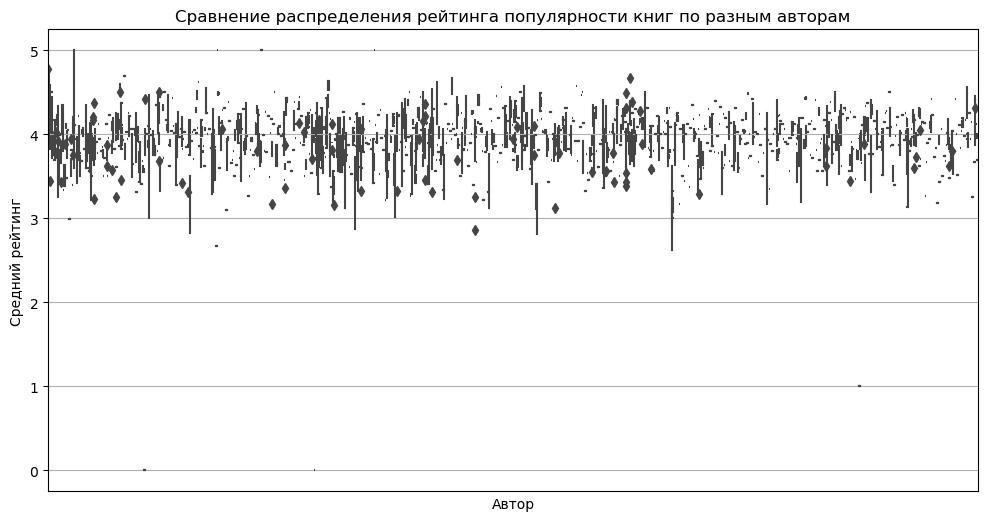

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных с указанием кодировки latin1
data = pd.read_csv("C:\\Users\\user\\Desktop\\books_update.csv", encoding='latin1')

# Построим box plot для сравнения распределения рейтинга популярности книг по разным авторам
plt.figure(figsize=(12, 6))
sns.boxplot(x='authors', y='average_rating', data=data)
plt.title('Сравнение распределения рейтинга популярности книг по разным авторам')
plt.xlabel('Автор')
plt.ylabel('Средний рейтинг')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.xticks([])
plt.show()

Из проведенного анализа сравнения распределения рейтинга популярности книг, написанных разными авторами, можно сделать следующие выводы:

* Распределение рейтинга книг по разным авторам имеет значительные различия. Некоторые авторы имеют более высокие оценки книг, в то время как у других средний рейтинг ниже.
* На box plot видно, что у некоторых авторов рейтинги книг имеют широкий диапазон, отмечая тем самым вариативность приемов и стилей, используемых в различных произведениях.
* Есть авторы, у которых большинство книг имеют высокие рейтинги, что может свидетельствовать о их популярности среди читателей.
* Некоторые авторы имеют книги с более низкими рейтингами, что может указывать на разнообразие восприятия их творчества или же на более специфическую аудиторию.

## 2.6. Тепловая карта (heatmap) зависимости рейтинга популярности книги от жанра и количества страниц

c:\Users\user\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


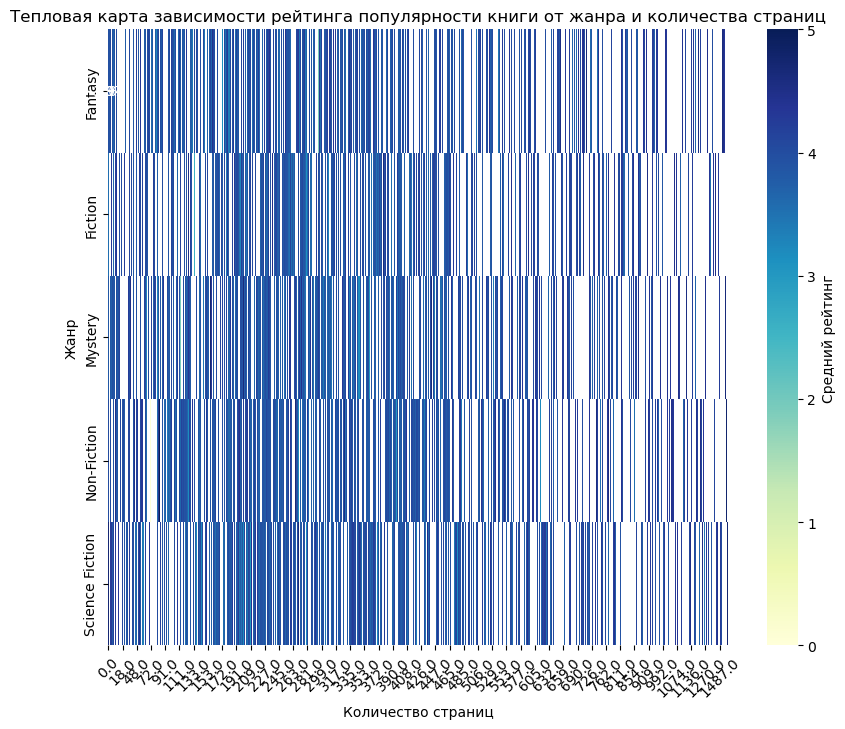

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных с указанием кодировки latin1
data = pd.read_csv("C:\\Users\\user\\Desktop\\books_update.csv", encoding='latin1')



# Создадим тепловую карту (heatmap) зависимости рейтинга популярности книги от жанра и количества страниц
plt.figure(figsize=(10, 8))
heatmap_data = data.pivot_table(index='genre', columns='num_pages', values='average_rating', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".2f", cbar_kws={'label': 'Средний рейтинг'})
plt.title('Тепловая карта зависимости рейтинга популярности книги от жанра и количества страниц')
plt.xlabel('Количество страниц')
plt.ylabel('Жанр')
plt.xticks(rotation=45)
plt.show()

Из тепловой карты зависимости рейтинга популярности книги от жанра и количества страниц можно сделать следующие выводы:

* Жанр и количество страниц влияют на рейтинг книги: Из тепловой карты видно, что средний рейтинг книги имеет зависимость от выбранного жанра и количества страниц. Некоторые жанры и диапазоны числа страниц могут иметь более высокие или низкие оценки, что указывает на важность этих параметров для читателей.
* Наиболее популярные жанры: Из тепловой карты можно увидеть, какие жанры книг наиболее популярны среди читателей. Например, если определенный жанр имеет более высокие средние оценки в различных диапазонах количества страниц, это может указывать на его популярность.
* Важность длины книги: Тепловая карта может также показать, как длина книги влияет на ее рейтинг. Например, можно выявить предпочтения читателей по длине книг: короткие, средние или длинные произведения

## 2.7. Bar chart, сравнивающий количество книг, выпущенных в каждом десятилетии.

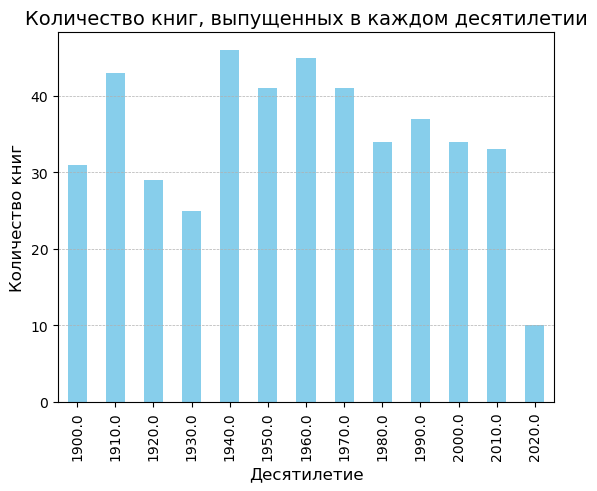

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных с указанием кодировки latin
data = pd.read_csv("C:\\Users\\user\\Desktop\\books_update.csv", encoding='latin1')

# Преобразование столбца release_year;;; в числовой тип данных
data['release_year;;;'] = pd.to_numeric(data['release_year;;;'], errors='coerce')

# Убедимся, что преобразование прошло успешно
data = data.dropna(subset=['release_year;;;'])

# Группировка данных по десятилетиям и подсчет количества книг в каждом десятилетии
bar_data = data.groupby((data['release_year;;;'] // 10) * 10)['title'].count()

# Создание объекта графика
fig, ax = plt.subplots()

# Построение bar chart
bar_data.plot(kind='bar', ax=ax, color='skyblue')

# Настройка внешнего вида графика
plt.title('Количество книг, выпущенных в каждом десятилетии', fontsize=14)
plt.xlabel('Десятилетие', fontsize=12)
plt.ylabel('Количество книг', fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Отображение графика
plt.show()

## 2.8. Визуализация зависимости рейтинга популярности книги от количества страниц с помощью scatter plot


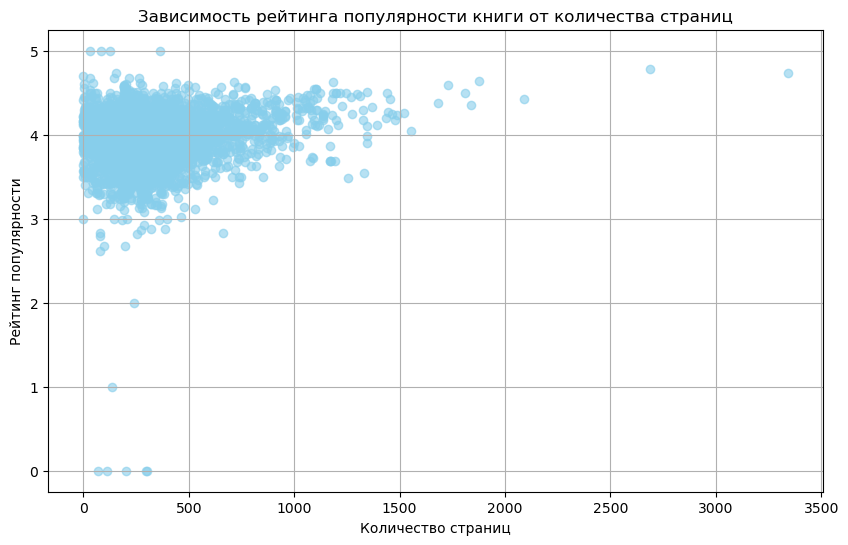

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных с указанием кодировки latin
data = pd.read_csv("C:\\Users\\user\\Desktop\\books_update.csv", encoding='latin1')

# Создание scatter plot для визуализации зависимости
plt.figure(figsize=(10, 6))
plt.scatter(data['num_pages'], data['average_rating'], color='skyblue', alpha=0.6)
plt.title('Зависимость рейтинга популярности книги от количества страниц')
plt.xlabel('Количество страниц')
plt.ylabel('Рейтинг популярности')
plt.grid(True)
plt.show()

Из графика, отображающего зависимость рейтинга популярности книг от количества страниц, можно сделать следующие выводы:

* Нет явной зависимости: На scatter plot не наблюдается четкой зависимости между рейтингом популярности книги и количеством страниц. Точки данных распределены достаточно равномерно по графику, что может указывать на отсутствие прямой корреляции.
* Разнообразие данных: Так как точки разбросаны по всей области графика, можно предположить, что книги с разным количеством страниц могут иметь разный рейтинг популярности. Например, какие-то короткие книги могут быть очень популярными, а длинные - менее популярными.
* Наблюдение выбросов: На графике могут быть видны выбросы - отдельные точки данных, которые значительно выбиваются из общего распределения и имеют необычно высокий или низкий рейтинг при относительно небольшом или большом количестве страниц.

## 2.9. Временная шкала (timeline), отображающая количество книг, выпущенных в каждом году

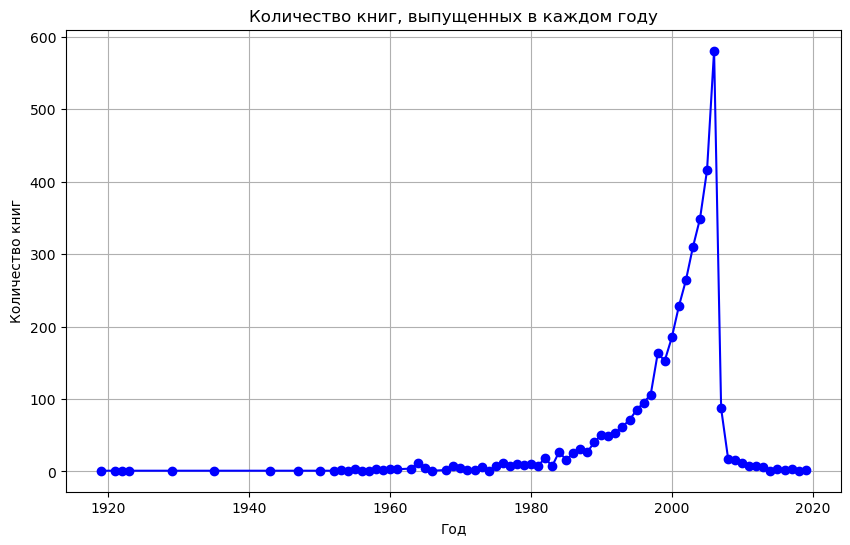

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных с указанием кодировки latin
data = pd.read_csv("C:\\Users\\user\\Desktop\\books_update.csv", encoding='latin1')

# Преобразование столбца с датой в формат datetime
data['publication_date'] = pd.to_datetime(data['publication_date'])

# Создание нового столбца с годом публикации книги
data['publication_year'] = data['publication_date'].dt.year

# Подсчет количества книг, выпущенных в каждом году
book_count_by_year = data['publication_year'].value_counts().sort_index()

# Создание временной шкалы
plt.figure(figsize=(10, 6))
plt.plot(book_count_by_year.index, book_count_by_year.values, marker='o', color='b')
plt.xlabel('Год')
plt.ylabel('Количество книг')
plt.title('Количество книг, выпущенных в каждом году')
plt.grid(True)
plt.show()

Из временной шкалы, отображающей количество книг, выпущенных в каждом году, можно сделать следующие выводы:

* Увеличение выпуска книг в последние годы: График показывает увеличение выпуска книг в течение времени. Это может указывать на рост интереса к чтению и публикации книг.
* Пиковые годы: Некоторые годы на графике могут выделяться как пиковые, где было выпущено значительное количество книг. 

## 2.10. Гистограмма распределения количества страниц в книгах.

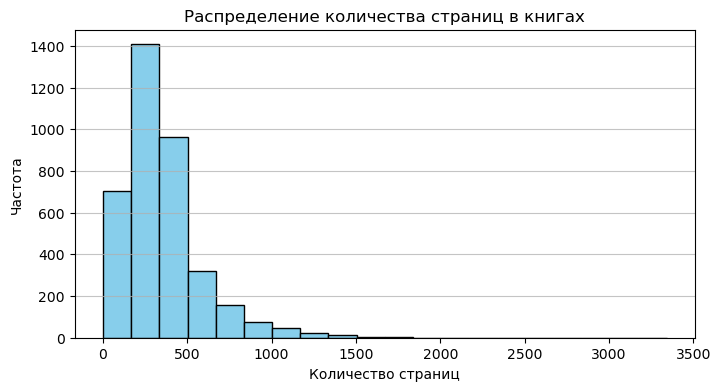

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных с указанием кодировки latin
data = pd.read_csv("C:\\Users\\user\\Desktop\\books_update.csv", encoding='latin1')

# Построение гистограммы количества страниц в книгах
plt.figure(figsize=(8, 4))
plt.hist(data['num_pages'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение количества страниц в книгах')
plt.xlabel('Количество страниц')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)

plt.show()

Из гистограммы распределения количества страниц в книгах видно, что большинство книг имеют небольшое количество страниц.